# Implement Value Iteration for the Gambler's Problem (Exercise Reinforcement Learning: an Introduction, 2nd edition" by Sutton & Barto (2018) 

- The book reference can be found here: http://incompleteideas.net/book/RLbook2020.pdf 

In [1]:
import numpy as np
import seaborn as sns

Text(0.5, 1.0, 'Capital versus optimal policy')

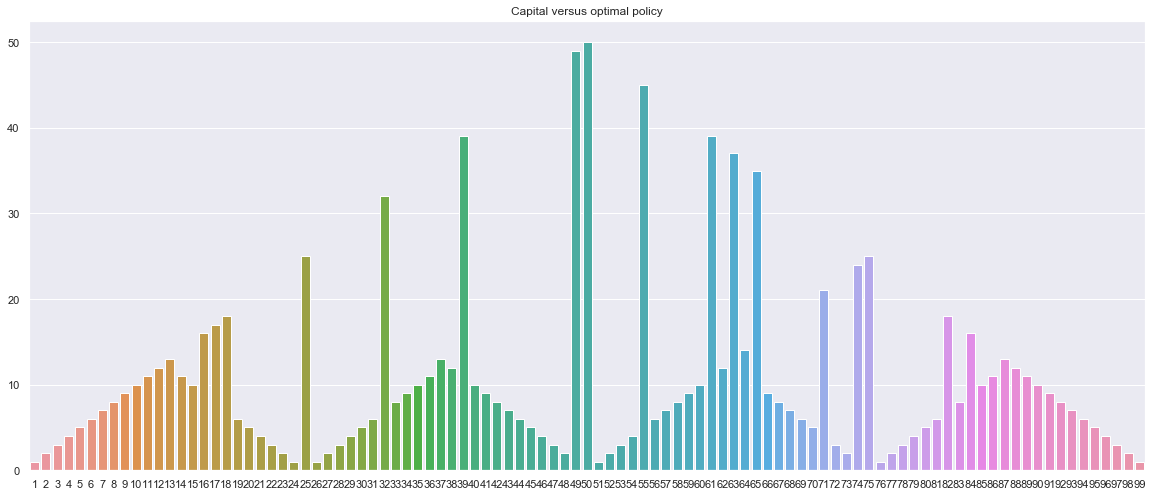

In [4]:
# Define parameters
Lambda = 1 # Discount factor each time we lose
Ph = 0.4 # Probability of heads
theta = 0.0000000000000001 # Change in value permitted before breaking (threshold)

# Initialise dictionaries
values = {i: 0 for i in range(0,101)}
rewards = {i: 0 for i in range(0, 101)} # 0 reward for all states except...
rewards[100] = 1 # 100, which has a reward of 1
delta = 0.0002

# Iterate value until improvements are smaller than theta threshold
while delta > theta:
 
    delta = 0
    
    for S in range(1,100):

        v_max = 0 # max value for this state across all actions
        a_max = 0 # Action associated with max value for this state across all actions
        
        for a in range(1, min(S+1, 101-S)): # Possible stakes range from 1 to the minimum between: current state/ stake needed to reach 100
            
            # Action value based on Bellman equations
            action_val = (Ph * (rewards.get(S+a) + Lambda * values.get(S+a))) + ((1- Ph) * (rewards.get(S-a) +  (values.get(S-a) * Lambda)))
            
            if action_val > v_max: 
                a_max = a
                v_max = action_val
        
        delta = max(delta, abs(v_max - values[S])) # Calculate max distance between any value and its next iteration
        values[S] = v_max # Iterate value

# After values have converged, identify best policy associated with best values
# Initialse policy
policy = {i: 1 for i in range(1,100)} # mapping from state to action

for S in range(1, 100): 
    
    v_max = 0
    a_max = 0
    
    for a in range(1, min(S+1, 101-S)):
        
        action_val = (Ph * (rewards.get(S+a) + (Lambda* values.get(S+a)))) + ((1- Ph) * (rewards.get(S-a) + (values.get(S-a) * Lambda)))  

        if action_val > v_max: 
            a_max = a
            v_max = action_val
            
    # Assign best action to optimal policy
    policy[S] = a_max

# Plot optimum stake for each state
sns.set(rc={'figure.figsize':(20,8.27)})
sns.barplot(x = list(policy.keys()), y= list(policy.values())).set_title('Capital versus optimal policy')

- Here we observe that the optimal policy is similar to, but not exactly the same as the one presented in the Sutton & Barto book. This may be because alternative solutions equally optimise the value for this level of recursion and theta threshold. 
- Evidence for this is found in the graph below, which was created by exactly the same algorithm, with the exception that each action value would be replaced if it was greater than or equal to the previous maximum, rather than just greater than the previous maximum.

Text(0.5, 1.0, 'Capital versus optimal policy')

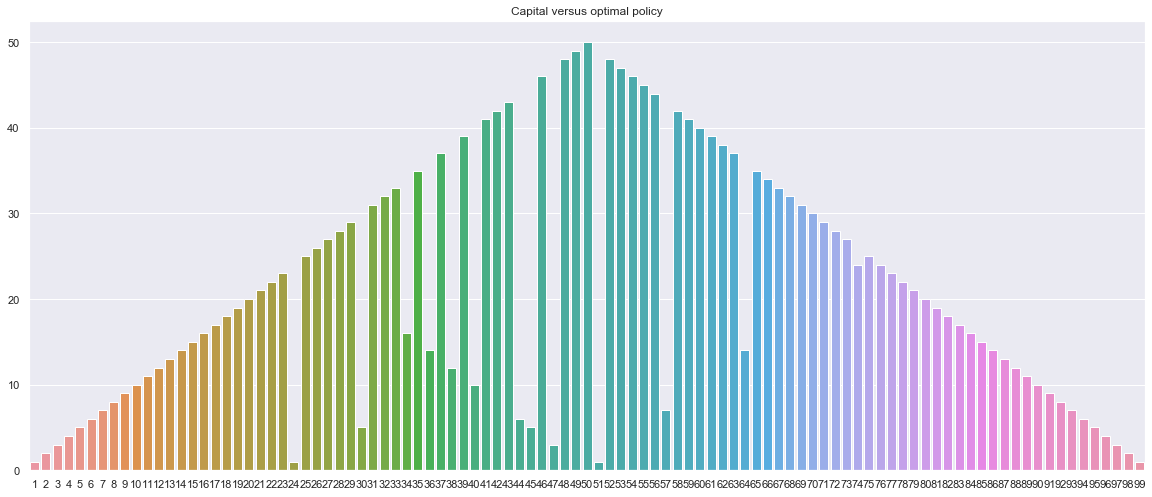

In [24]:
values = {key: round(value, 2) for key, value in values.items()}
print('Optimised values:', values)

Optimised values: {0: 0, 1: 0.0, 2: 0.01, 3: 0.01, 4: 0.01, 5: 0.02, 6: 0.02, 7: 0.03, 8: 0.03, 9: 0.04, 10: 0.04, 11: 0.05, 12: 0.06, 13: 0.07, 14: 0.07, 15: 0.07, 16: 0.08, 17: 0.09, 18: 0.09, 19: 0.1, 20: 0.11, 21: 0.12, 22: 0.13, 23: 0.13, 24: 0.14, 25: 0.16, 26: 0.16, 27: 0.17, 28: 0.17, 29: 0.18, 30: 0.19, 31: 0.19, 32: 0.2, 33: 0.21, 34: 0.22, 35: 0.23, 36: 0.24, 37: 0.25, 38: 0.26, 39: 0.26, 40: 0.27, 41: 0.28, 42: 0.29, 43: 0.3, 44: 0.31, 45: 0.32, 46: 0.33, 47: 0.35, 48: 0.36, 49: 0.38, 50: 0.4, 51: 0.4, 52: 0.41, 53: 0.41, 54: 0.42, 55: 0.43, 56: 0.43, 57: 0.44, 58: 0.45, 59: 0.46, 60: 0.47, 61: 0.48, 62: 0.49, 63: 0.5, 64: 0.5, 65: 0.51, 66: 0.52, 67: 0.53, 68: 0.54, 69: 0.55, 70: 0.56, 71: 0.57, 72: 0.59, 73: 0.6, 74: 0.62, 75: 0.64, 76: 0.64, 77: 0.65, 78: 0.66, 79: 0.67, 80: 0.68, 81: 0.69, 82: 0.7, 83: 0.71, 84: 0.72, 85: 0.74, 86: 0.75, 87: 0.77, 88: 0.79, 89: 0.8, 90: 0.81, 91: 0.82, 92: 0.83, 93: 0.85, 94: 0.87, 95: 0.88, 96: 0.9, 97: 0.92, 98: 0.94, 99: 0.96, 100: 0

# Adjusting Ph

Text(0.5, 1.0, 'Capital versus optimal policy, Ph = 0.75, Lambda = 0.9')

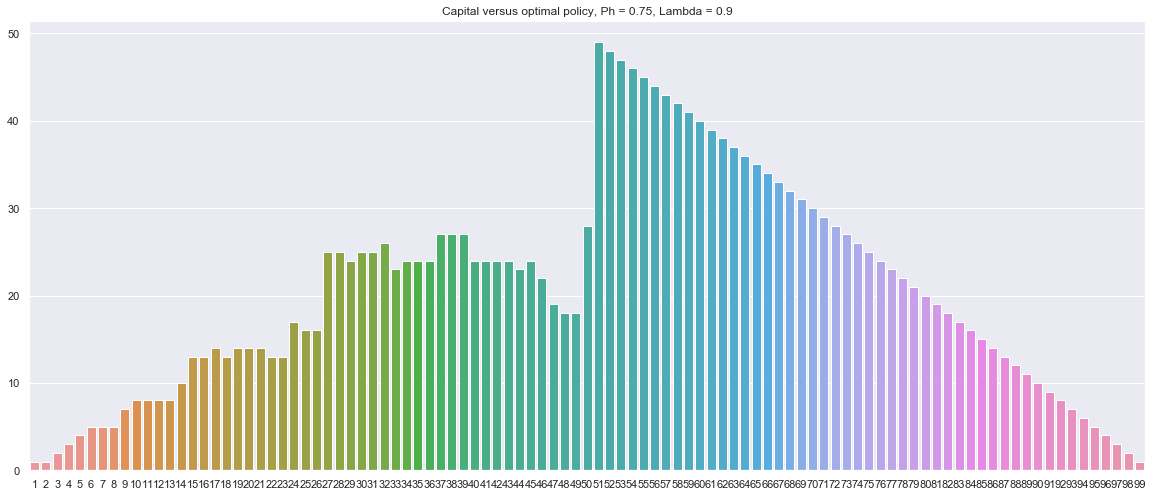

Text(0.5, 1.0, 'Capital versus optimal policy, Ph = 0.3, Lambda = 1')

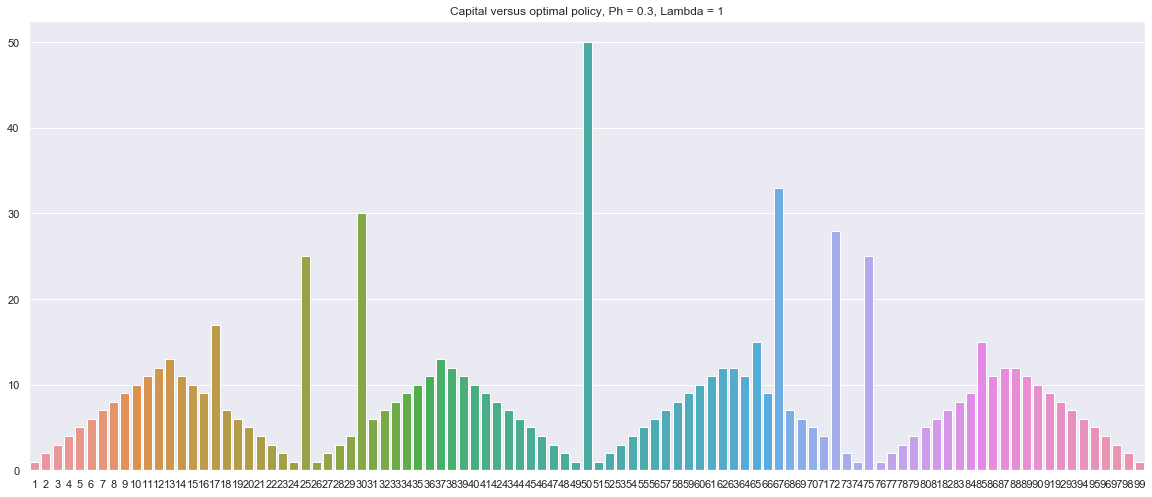

Text(0.5, 1.0, 'Capital versus optimal policy, Ph = 0.9, Lambda = 1')

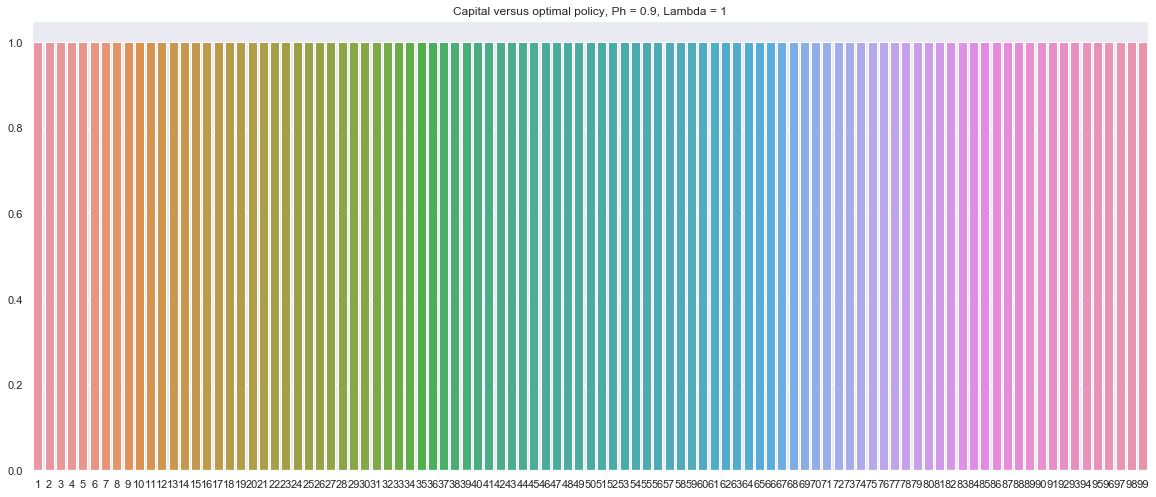

# Adjusting Lambda

Text(0.5, 1.0, 'Capital versus optimal policy, Ph = 0.3, Lambda = 0.2')

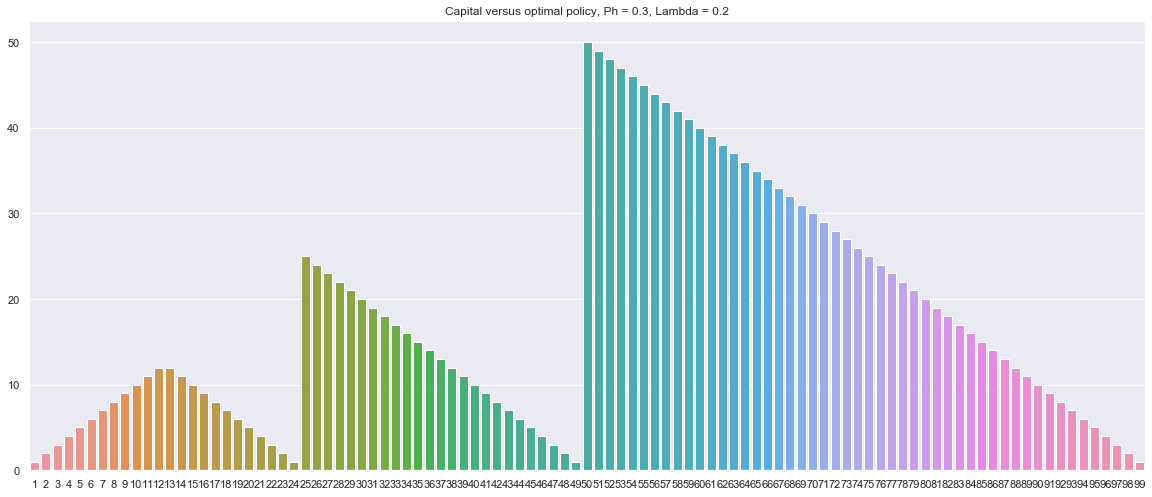

Text(0.5, 1.0, 'Capital versus optimal policy, Ph = 0.3, Lambda = 0.7')

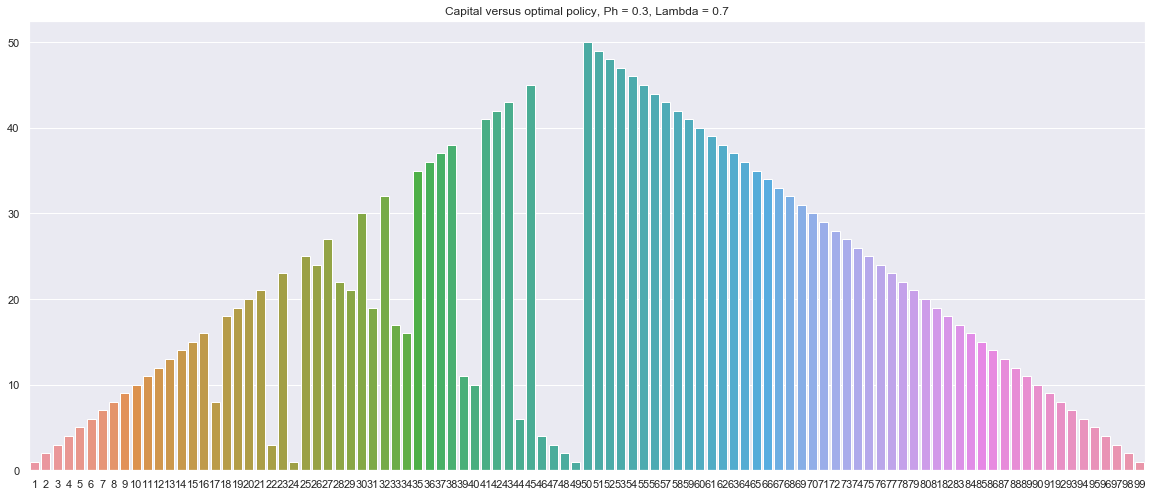